# Comparing Networks

In this notebook, we want to compare different network to each other.
We will start of with...

- Untrained Model
- Trained Model
- Trained Model (Exact Unlearning)*$^1$

All these model should serve as comparison point for approximate MU Algorithms, which we want to try out

*$^1$ Exact Unlearning: refers to an complete retraining of the Model, without the samples which we want to unlearn.

In [1]:
import os
import sys

# Add the parent directory to sys.path
sys.path.append(os.path.join('..', 'src'))

import torch
import copy
from PIL import Image
import numpy as np
# from helper import get_model TODO Muss überarbeitet werden
from mlp_dataclass import MNIST_CostumDataset, TwoLayerPerceptron, ConvNet
from training import main, train_n_models
from helper import load_models_dict

USED_DATASET = "mnist"
# OUT OF: ["mnist", "cmnist", "fashion_mnist"]

ALLREADY_TRAINED = False

data = MNIST_CostumDataset(
    sample_mode="only_erased",
    train= False,
    test = True,
    classes=["7"],
    dataset_name = USED_DATASET,
    download=True,
)
len(data)

c:\Users\morit\miniconda3\envs\bach.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


139

In [2]:
def prepare_sample(path:str):
    """preps sample to pass to model, transforms to tensor, reshape to 784, shaping it as batch"""
    sample = Image.open(path).convert("L")
    sample = torch.Tensor(np.array(sample)).reshape(784)
    
    return sample.unsqueeze(0)

def show_sample(sample:torch.Tensor):
    """Converts the sample to a numpy array and reshapes it to a 28x28 image"""
    sample = sample.reshape(28, 28)
    sample = sample.numpy()
    sample = Image.fromarray(sample)
    return sample

____

### Untrained Model

We want to include an untrained model as a pour reference point.

Later, we will compare the differently trained (and untrained) models on different metrics. We are thinking, that the **untrained model should always be the furthest neighbor** and see if thats true. Also out of pur curiosity, how do the models compare according to the found metrics to the untrained model.

It could be interesting to see, if the unlearned models tend to be more similar to the "Exact MU Model" or to the "Untrained Model"

The "Trained Model"´s and "Exact Model"´s starting point is the "Untrained Model". That means all models can be traced back to it.

In [4]:
untrained_model = TwoLayerPerceptron()

In [ ]:
untrained_ms = {f"untrained_{USED_DATASET}_{v}": TwoLayerPerceptron() for v in range(30)}

___

### Trained Model

This model will be the starting point for all MU algorithms. The more it is important that it does not change throughout the experiments, otherwise we need to run everything again.

Notes Regarding the Dataloader: We included Up-/Downsampling. There is a counter in the Dataset class, which controls, which class is next to provide a sample. From the available pool a sample will be chosen at random.

Reason: The amount of available samples should not influence the performance of the model on certain classes.

Regarding the samples for the class "7": There are more samples of sevens without a middle line than ones with.

Ratio: 
- 6268 (train: 5385, test: 883)
- 1025 (train: 880,  test: 145)

Should there be concerns regarding that the bigger part of the sevens (without middle line) will be unlearning?

Number of Updates [6000/60000] - Train Loss: 1.4348 - Val Loss: 0.9996 - Train Accuracy: 0.6228 - Val Accuracy: 0.6737


Number of Updates [12000/60000] - Train Loss: 0.8719 - Val Loss: 0.7967 - Train Accuracy: 0.7138 - Val Accuracy: 0.7330


Number of Updates [18000/60000] - Train Loss: 0.7388 - Val Loss: 0.7124 - Train Accuracy: 0.7542 - Val Accuracy: 0.7571


Number of Updates [24000/60000] - Train Loss: 0.6776 - Val Loss: 0.6613 - Train Accuracy: 0.7763 - Val Accuracy: 0.7819


Number of Updates [30000/60000] - Train Loss: 0.6296 - Val Loss: 0.6248 - Train Accuracy: 0.7908 - Val Accuracy: 0.7887


Number of Updates [36000/60000] - Train Loss: 0.6039 - Val Loss: 0.6190 - Train Accuracy: 0.8053 - Val Accuracy: 0.7927


Number of Updates [42000/60000] - Train Loss: 0.5912 - Val Loss: 0.6162 - Train Accuracy: 0.8123 - Val Accuracy: 0.7939


Number of Updates [48000/60000] - Train Loss: 0.5825 - Val Loss: 0.6137 - Train Accuracy: 0.8152 - Val Accuracy: 0.7933


Number of Updates [54000/60000] - Train Loss: 0.5900 - Val Loss: 0.6106 - Train Accuracy: 0.8107 - Val Accuracy: 0.7950


Number of Updates [60000/60000] - Train Loss: 0.5960 - Val Loss: 0.6080 - Train Accuracy: 0.8048 - Val Accuracy: 0.7941


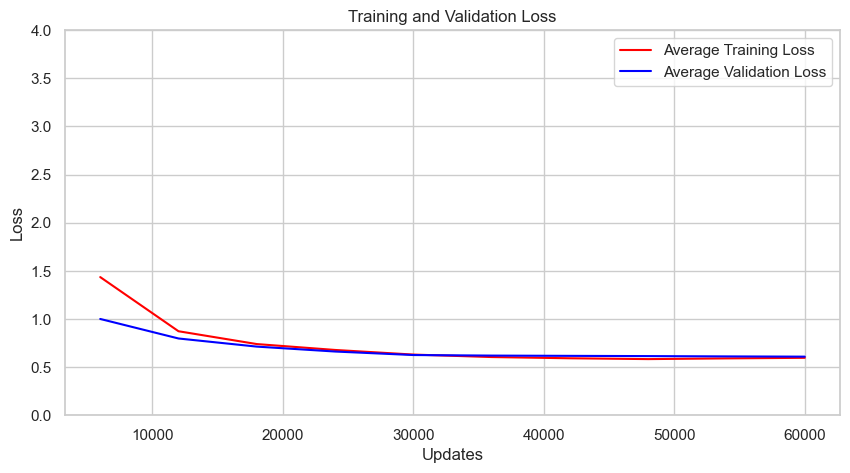

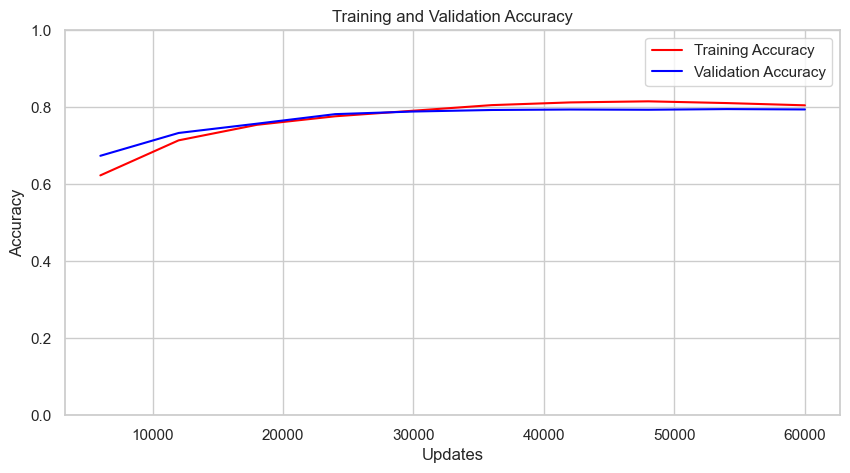

Model saved to:  ..\data\models\fashion_mnist\all\TwoLayerPerceptron_b_trained_showcase


In [6]:
# Train a single model first
if not ALLREADY_TRAINED:
    trained_showcase_all = main(
        new_name="trained_showcase",
        model=None,
        sampling_mode="all",
        balanced=True,
        dataset_name="fashion_mnist",
        include_val=True,
        logs=True,
    )
else:
    if USED_DATASET in ["mnist", "fashion_mnist"]:
        trained_showcase_all= TwoLayerPerceptron()
    if USED_DATASET in ["cmnist"]:
        trained_showcase_all = ConvNet()
    trained_showcase_all.load_state_dict(
        torch.load(
            path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}TwoLayerPerceptron_b_trained_showcase",
            weights_only=True
            )
        )

In [ ]:
if not ALLREADY_TRAINED:
    trained_ms = train_n_models(
        sampling_mode="all",
        dataset_name=USED_DATASET,
        logs=False,
        test_ensemble=True,
    )
else:
    trained_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}test_ensemble")

Training models: 100%|██████████| 30/30 [03:46<00:00,  7.56s/models]


___

### Exact Unlearned Model

This model has the same training conditions as the "Trained Model", with the only difference being, that it had no sevens __with no middle line__

Number of Updates [6000/60000] - Train Loss: 2.0449 - Val Loss: 1.7457 - Train Accuracy: 0.6097 - Val Accuracy: 0.7935


Number of Updates [12000/60000] - Train Loss: 1.4780 - Val Loss: 1.1945 - Train Accuracy: 0.8008 - Val Accuracy: 0.8389


Number of Updates [18000/60000] - Train Loss: 1.0457 - Val Loss: 0.8682 - Train Accuracy: 0.8287 - Val Accuracy: 0.8562


Number of Updates [24000/60000] - Train Loss: 0.8222 - Val Loss: 0.6956 - Train Accuracy: 0.8357 - Val Accuracy: 0.8707


Number of Updates [30000/60000] - Train Loss: 0.6676 - Val Loss: 0.5906 - Train Accuracy: 0.8633 - Val Accuracy: 0.8802


Number of Updates [36000/60000] - Train Loss: 0.6153 - Val Loss: 0.5825 - Train Accuracy: 0.8715 - Val Accuracy: 0.8811


Number of Updates [42000/60000] - Train Loss: 0.6175 - Val Loss: 0.5747 - Train Accuracy: 0.8610 - Val Accuracy: 0.8816


Number of Updates [48000/60000] - Train Loss: 0.5980 - Val Loss: 0.5672 - Train Accuracy: 0.8732 - Val Accuracy: 0.8826


Number of Updates [54000/60000] - Train Loss: 0.5922 - Val Loss: 0.5601 - Train Accuracy: 0.8698 - Val Accuracy: 0.8837


Number of Updates [60000/60000] - Train Loss: 0.5877 - Val Loss: 0.5534 - Train Accuracy: 0.8748 - Val Accuracy: 0.8839


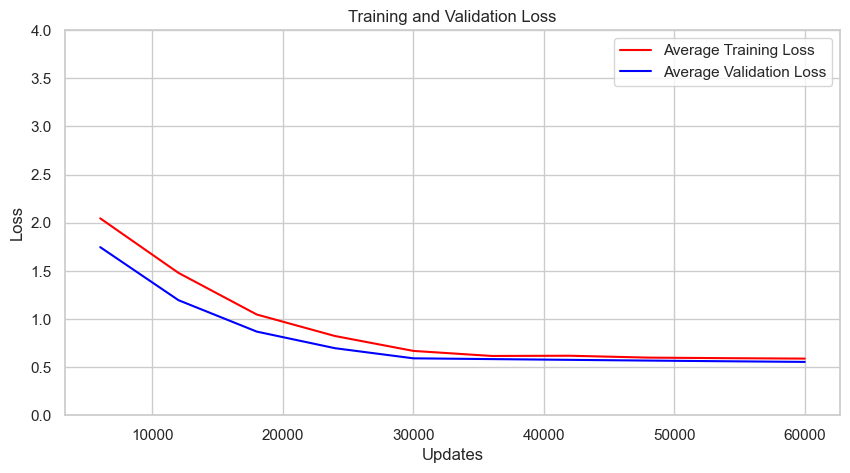

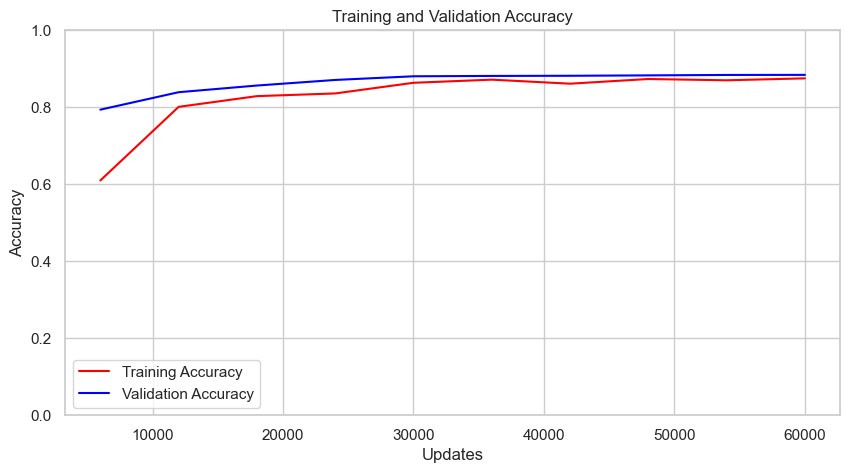

Model saved to:  ..\data\models\mnist\except_erased\TwoLayerPerceptron_b_trained_showcase


In [7]:
# Train a single model first
if not ALLREADY_TRAINED:
    trained_showcase_except = main(
        new_name="trained_showcase",
        model=None,
        sampling_mode="except_erased",
        balanced=True,
        dataset_name=USED_DATASET,
        include_val=True,
        logs=True,
    )
else:
    if USED_DATASET in ["mnist", "fashion_mnist"]:
        trained_showcase_except= TwoLayerPerceptron()
    if USED_DATASET in ["cmnist"]:
        trained_showcase_except = ConvNet()
    trained_showcase_except.load_state_dict(
        torch.load(
            path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}except_erased{os.sep}TwoLayerPerceptron_b_trained_showcase",
            weights_only=True
            )
        )

In [ ]:
if not ALLREADY_TRAINED:
    exact_ms = train_n_models(
        sampling_mode="except_erased",
        dataset_name=USED_DATASET,
        logs=False,
        test_ensemble=True,
    )
else:
    exact_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}except_erased{os.sep}test_ensemble")

Training models: 100%|██████████| 30/30 [03:52<00:00,  7.74s/models]


___

## Metrics

In [8]:
from metrics import calc_accuracy
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

### L2 Norm

Compare how the different models are from each other using the L2 Norm, comparing every parameter with each other

In [9]:
from metrics import model_l2_norm_difference, calc_mutlimodel_metric_average

We can luckily cut down on some calculations, since the **L2-Norm** is symmetrical

#### Unlearn to ...

In [ ]:
# ...trained model
a11 = calc_mutlimodel_metric_average(untrained_model, trained_ms, metric="l2_norm")
a11

In [ ]:
# ...exact model
a12 = calc_mutlimodel_metric_average(untrained_ms, exact_ms, metric="l2_norm")
a12

#### Trained to ...

In [ ]:
# ...untrained model
a21 = calc_mutlimodel_metric_average(trained_ms, exact_ms, metric="l2_norm")
a21

#### Exact to ...

In [ ]:
# see above

### KL-Divergence

Used to compare the difference between distribution, but may also be used to compare models by their predicted target distributions.

In [10]:
from metrics import kl_divergence_between_models
from torch.utils.data import DataLoader
dataloader = DataLoader(
    dataset=data,
    batch_size=8,
    shuffle=False,
)

#### Unlearned to...

In [13]:
kl_divergence_between_models(trained_showcase_all[0], trained_showcase_except[0], data_loader=data)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

#### Trained to...

#### Exact to...

### Accuracy

- $D_{Gesamt}$
- $D_{Erased}$
- $D_{Remain}$
- $D_{Accuracy Per Class}$

In [23]:
from visualize import boxplotting_multimodel_eval

Now, let us see what metrics each model has

In [24]:
# Macht vllt ned so viel Sinn, fand i nur witzig
# boxplotting_multimodel_eval

Starts evaluation for 'mnist'...


Average Accuracy for D_gesamt: 0.8712 - Standard Deviation for D_gesamt: 0.0005


Average Accuracy for D_erased: 0.5148 - Standard Deviation for D_erased: 0.0098


Average Accuracy for D_remain: 0.8763 - Standard Deviation for D_remain: 0.0005


Average Accuracy for 0: 0.9666 - Standard Deviation for 0: 0.0008


Average Accuracy for 1: 0.9217 - Standard Deviation for 1: 0.0015


Average Accuracy for 2: 0.7824 - Standard Deviation for 2: 0.0035


Average Accuracy for 3: 0.8770 - Standard Deviation for 3: 0.0022


Average Accuracy for 4: 0.8895 - Standard Deviation for 4: 0.0019


Average Accuracy for 5: 0.7951 - Standard Deviation for 5: 0.0031


Average Accuracy for 6: 0.8946 - Standard Deviation for 6: 0.0019


Average Accuracy for 8: 0.8602 - Standard Deviation for 8: 0.0026


Average Accuracy for 9: 0.8223 - Standard Deviation for 9: 0.0022


Average Accuracy for 7_all: 0.8896 - Standard Deviation for 7_all: 0.0017


Average Accuracy for 7_remain: 0.9485 - Standard Deviation for 7_remain: 0.0011


Average Accuracy for 7_erased: 0.5148 - Standard Deviation for 7_erased: 0.0098
plotting...


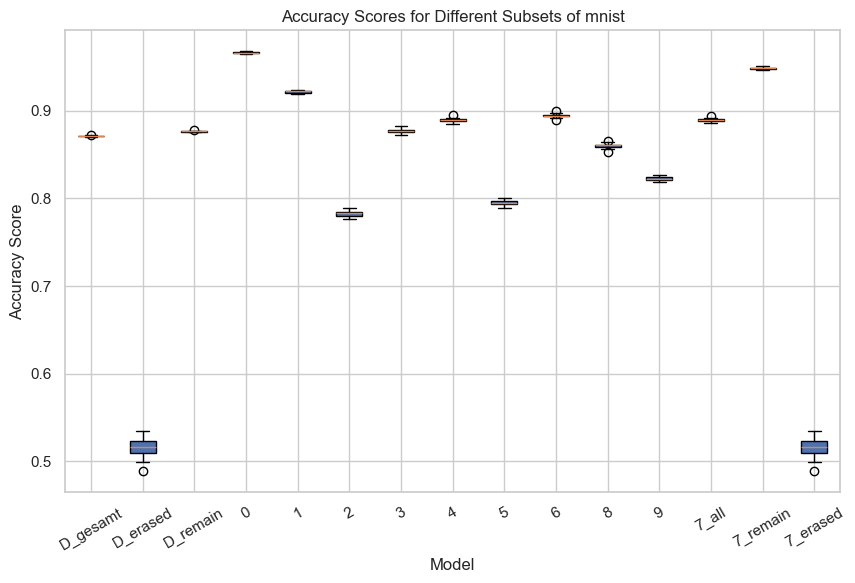

{'D_gesamt': [0.8715857142857143,
  0.8711285714285715,
  0.8715285714285714,
  0.8713428571428572,
  0.8707714285714285,
  0.8713,
  0.8713571428571428,
  0.8716714285714285,
  0.8714428571428572,
  0.8706857142857143,
  0.8705,
  0.8707714285714285,
  0.8726428571428572,
  0.8709571428571429,
  0.8719857142857143,
  0.8707428571428572,
  0.8700142857142857,
  0.8714571428571428,
  0.8715,
  0.8702142857142857,
  0.8715857142857143,
  0.8716285714285714,
  0.8702285714285715,
  0.8714571428571428,
  0.8714571428571428,
  0.8711142857142857,
  0.8715142857142857,
  0.8711142857142857,
  0.8711714285714286,
  0.8716857142857143],
 'D_erased': [0.5237134207870837,
  0.5237134207870837,
  0.5065590312815338,
  0.5126135216952573,
  0.5035317860746721,
  0.5005045408678103,
  0.5287588294651867,
  0.5105953582240161,
  0.520686175580222,
  0.5166498486377397,
  0.5267406659939455,
  0.515640766902119,
  0.515640766902119,
  0.5105953582240161,
  0.5257315842583249,
  0.5166498486377397,
  

In [ ]:
# can take like 80minutes
boxplotting_multimodel_eval(trained_ms, dataset_name="mnist", evaluation="accuracy", logs=True)

Starts evaluation for 'mnist'...


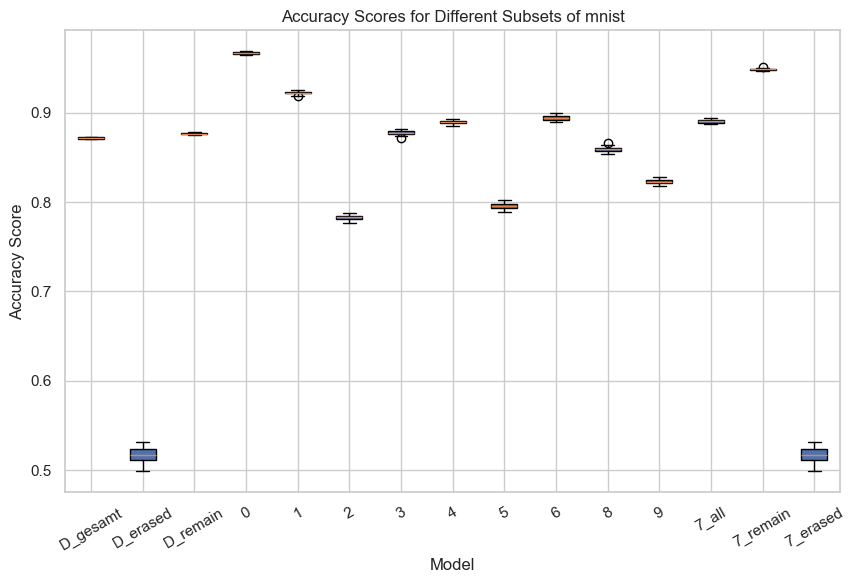

{'D_gesamt': [0.8713428571428572,
  0.8710571428571429,
  0.8710571428571429,
  0.8705428571428572,
  0.8723571428571428,
  0.8727428571428572,
  0.8728428571428571,
  0.8709571428571429,
  0.8706714285714285,
  0.8712142857142857,
  0.8721428571428571,
  0.8723857142857143,
  0.8725142857142857,
  0.8711571428571429,
  0.8709142857142858,
  0.8709,
  0.8702857142857143,
  0.8698285714285714,
  0.8718285714285714,
  0.8701714285714286,
  0.8713285714285715,
  0.8719,
  0.8704571428571428,
  0.8719714285714286,
  0.8705714285714286,
  0.8716857142857143,
  0.8704571428571428,
  0.8724571428571428,
  0.8698,
  0.8723],
 'D_erased': [0.5287588294651867,
  0.515640766902119,
  0.5257315842583249,
  0.5186680121089808,
  0.5116044399596368,
  0.5176589303733602,
  0.5116044399596368,
  0.5065590312815338,
  0.49848637739656915,
  0.5216952573158425,
  0.5216952573158425,
  0.5267406659939455,
  0.5166498486377397,
  0.5307769929364279,
  0.5025227043390514,
  0.5267406659939455,
  0.5136226

In [ ]:
# can take like 80minutes
boxplotting_multimodel_eval(exact_ms, dataset_name=USED_DATASET, evaluation="accuracy", logs=True)